# Installation

In [1]:
!conda install pandas -y
!conda install -c conda-forge matplotlib -y
!conda install seaborn -y
!conda install scipy -y
!conda install anaconda::openpyxl -y

# Importing

In [315]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import shapiro, mannwhitneyu, ttest_ind, levene, spearmanr

# Preprocessing

In [2]:
df = pd.read_excel('dataset.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 45 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   no.        60 non-null     int64 
 1   format     60 non-null     object
 2   md         60 non-null     int64 
 3   pd         60 non-null     int64 
 4   td         60 non-null     int64 
 5   pf         60 non-null     int64 
 6   ef         60 non-null     int64 
 7   fr         60 non-null     int64 
 8   arq1a      60 non-null     object
 9   arq1b      19 non-null     object
 10  arq2a      60 non-null     object
 11  arq2b      9 non-null      object
 12  arq3a      60 non-null     object
 13  arq3b      16 non-null     object
 14  arq4a      60 non-null     object
 15  arq4b      14 non-null     object
 16  arq5a      60 non-null     object
 17  arq5b      10 non-null     object
 18  arq6a      60 non-null     object
 19  arq6b      7 non-null      object
 20  arq7a      60 non-null     object


In [3]:
df

,no.,format,md,pd,td,pf,ef,fr,arq1a,arq1b,...,arq14b,qual1,qual2,qual3,recall,interpret,compre,lb,duration,ctrlf
0,1,Print,75,40,75,85,85,45,Disagree,NaN,...,NaN,I take less time when reading electronically,good lighting and a comfortable table and chair,Have a mouse/apple pencil to make it easier to...,4,3,7,1,513,Not Applicable
1,2,Screen,50,5,35,100,15,40,Strongly Agree,NaN,...,NaN,"Generally speaking, I generally like reading w...","Reading in a nice quiet area, with adequate li...",Use a dedicated reading app that allows you to...,5,3,8,14,763,No
2,3,Print,50,10,30,90,30,10,Depends,My memory of readings is not based on the medi...,...,NaN,My preference of electronic over printed is mo...,Its always better to be sitting up right on a ...,Not much that is not already in place i.e. zoo...,4,2,6,3,676,Not Applicable
3,4,Print,75,60,25,80,65,30,Depends,"Depending on the task, for shorter papers or p...",...,"Like I mentioned before, I would prefer both, ...","I hate reading, but for the times that I need ...","Depending on the paper, but usually diagrams a...",I prefer to have NotebookLLM or ChatGPT by the...,4,2,6,1,307,Not Applicable
4,5,Print,95,25,0,100,50,0,Depends,(Strongly Agree) I usually remember informatio...,...,NaN,I don't like reading academic papers I just re...,if i have a very delicious meal like steak and...,some way to automatically stop all of my effor...,4,3,7,1,320,Not Applicable
5,6,Screen,80,15,15,95,15,70,Depends,If the formatting of the course reading was cr...,...,NaN,I find well formatted and clear electronic mat...,I prefer to have the pages ordered correctly a...,I like to have a larger screen size as my eyes...,4,5,9,1,282,Yes
6,7,Screen,45,5,50,70,55,50,Depends,"Most of the time, I don't have printed reading...",...,"if i have the option, such as when prof gives ...","For me, I try to read on my tablet to replicat...","I usually, off my devices or DND, also I try t...",none comes to mind,5,4,9,11,592,Yes
7,8,Screen,80,55,55,40,40,20,Strongly Agree,NaN,...,I will still consider reading my course materi...,"Whenever I have to study for my majors, I make...",It's really important that when you read on pa...,My biggest factor when reading on laptop is th...,3,3,6,10,873,No
8,9,Print,0,50,40,100,75,15,Strongly Agree,NaN,...,NaN,Heading bullets on the left side of the pdf. T...,Bold face text for important terminnologies. F...,Focus mode changing the font style and the bac...,3,2,5,0,325,Not Applicable
9,10,Print,55,5,70,100,60,25,Agree,NaN,...,NaN,"If we are factoring in the convenience factor,...",Having writing materials and a place to take n...,"To read well on a laptop, turn on do not distu...",4,5,9,2,343,Not Applicable


In [4]:
df.describe()

,no.,md,pd,td,pf,ef,fr,recall,interpret,compre,lb,duration
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,30.500000,61.083333,23.166667,45.833333,76.333333,61.000000,32.250000,4.100000,3.150000,7.250000,10.283333,616.733333
std,17.464249,21.883584,22.567538,25.564254,19.869632,22.451454,26.608031,0.817188,1.204863,1.693707,10.473682,249.814498
min,1.000000,0.000000,0.000000,0.000000,20.000000,15.000000,0.000000,2.000000,0.000000,3.000000,0.000000,224.000000
25%,15.750000,45.000000,5.000000,25.000000,65.000000,48.750000,10.000000,4.000000,2.000000,6.000000,2.000000,412.500000
50%,30.500000,67.500000,15.000000,50.000000,80.000000,65.000000,25.000000,4.000000,3.000000,7.500000,7.000000,584.500000
75%,45.250000,76.250000,30.000000,65.000000,90.000000,75.000000,50.000000,5.000000,4.000000,8.250000,14.250000,786.000000
max,60.000000,100.000000,80.000000,95.000000,100.000000,100.000000,100.000000,5.000000,5.000000,10.000000,41.000000,1161.000000


In [5]:
mapping = {
    'Strongly Disagree': -2,
    'Disagree': -1,
    'Depends': 0,
    'Agree': 1,
    'Strongly Agree': 2
}

r_mapping = {
    'Strongly Disagree': 2,
    'Disagree': 1,
    'Depends': 0,
    'Agree': -1,
    'Strongly Agree': -2
}

reverse_qs = [2,6,8,11,12,14]

arq_quanti_labels = [f"arq{i+1}a" for i in range(14)]
for i, label in enumerate(arq_quanti_labels):
    if (i + 1) in reverse_qs:
        print(i + 1, "reversed")
    df[label] = df[label].map(r_mapping if (i + 1) in reverse_qs else mapping)

2 reversed
6 reversed
8 reversed
11 reversed
12 reversed
14 reversed


In [6]:
print_readers = df[df['format'] == 'Print'].reset_index().iloc[:,1:]
screen_readers = df[df['format'] == 'Screen'].reset_index().iloc[:,1:]

quanti_labels = ['no.', 'md', 'pd', 'td', 'pf', 'ef', 'fr'] + arq_quanti_labels + ['recall', 'interpret', 'compre', 'lb', 'duration']
print_readers_quanti = print_readers[quanti_labels]
screen_readers_quanti = screen_readers[quanti_labels]

In [7]:
print(print_readers_quanti.isna().any().any())
print(screen_readers_quanti.isna().any().any())

False
False


# Distribution Check

## NASA-TLX Distribution

In [8]:
nasa_tlx = df[['format', 'md', 'pd', 'td', 'pf', 'ef', 'fr']] 

NASA TLX grouped according to Format

In [9]:
nasa_tlx.groupby('format').describe().T

format         Print      Screen
md count   30.000000   30.000000
   mean    63.833333   58.333333
   std     24.589153   18.815499
   min      0.000000   15.000000
   25%     51.250000   45.000000
   50%     70.000000   60.000000
   75%     78.750000   73.750000
   max    100.000000   85.000000
pd count   30.000000   30.000000
   mean    23.666667   22.666667
   std     22.511810   22.996751
   min      0.000000    0.000000
   25%      6.250000    5.000000
   50%     17.500000   15.000000
   75%     30.000000   30.000000
   max     75.000000   80.000000
td count   30.000000   30.000000
   mean    45.833333   45.833333
   std     24.951102   26.590228
   min      0.000000    0.000000
   25%     26.250000   21.250000
   50%     50.000000   50.000000
   75%     65.000000   65.000000
   max     95.000000   90.000000
pf count   30.000000   30.000000
   mean    77.333333   75.333333
   std     21.684785   18.191194
   min     20.000000   30.000000
   25%     65.000000   70.000000
   50%     82.500000   75.000000
   75%     93.750000   90.000000
   max    100.000000  100.000000
ef count   30.000000   30.000000
   mean    61.500000   60.500000
   std     20.684410   24.436759
   min     20.000000   15.000000
   25%     50.000000   47.500000
   50%     65.000000   65.000000
   75%     73.750000   78.750000
   max    100.000000   95.000000
fr count   30.000000   30.000000
   mean    29.500000   35.000000
   std     26.695925   26.684620
   min      0.000000    0.000000
   25%     10.000000   16.250000
   50%     22.500000   27.500000
   75%     40.000000   53.750000
   max    100.000000   85.000000

In [38]:
nasa_tlx.groupby('format').median()

,md,pd,td,pf,ef,fr
format,,,,,,
Print,70.0,17.5,50.0,82.5,65.0,22.5
Screen,60.0,15.0,50.0,75.0,65.0,27.5


NASA TLX no group

In [39]:
nasa_tlx.describe()

,md,pd,td,pf,ef,fr
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,61.083333,23.166667,45.833333,76.333333,61.000000,32.250000
std,21.883584,22.567538,25.564254,19.869632,22.451454,26.608031
min,0.000000,0.000000,0.000000,20.000000,15.000000,0.000000
25%,45.000000,5.000000,25.000000,65.000000,48.750000,10.000000
50%,67.500000,15.000000,50.000000,80.000000,65.000000,25.000000
75%,76.250000,30.000000,65.000000,90.000000,75.000000,50.000000
max,100.000000,80.000000,95.000000,100.000000,100.000000,100.000000


In [40]:
nasa_tlx.iloc[:, 1:].median()

md    67.5
pd    15.0
td    50.0
pf    80.0
ef    65.0
fr    25.0
dtype: float64

NASA TLX Visualization

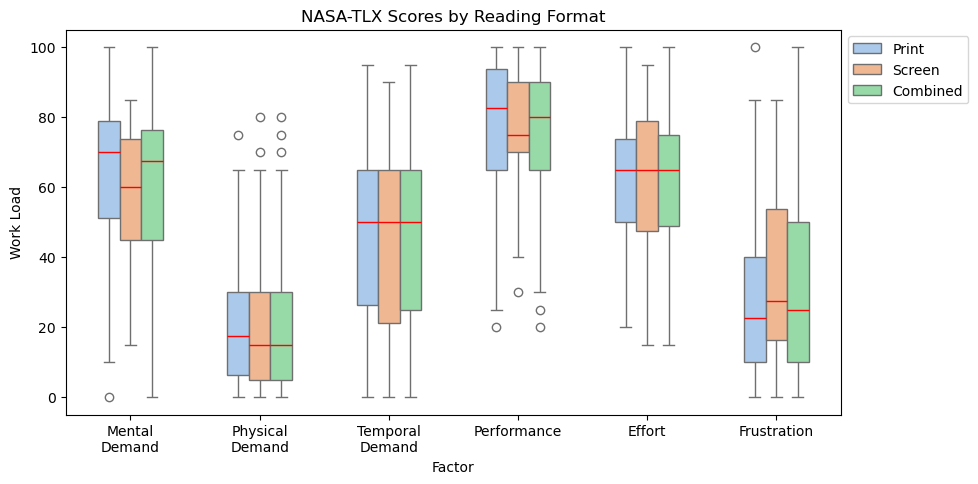

In [169]:
nasa_tlx_long = df.melt(id_vars=['format'], value_vars=['md', 'pd', 'td', 'pf', 'ef', 'fr'], 
                  var_name='factor', value_name='load')
nasa_tlx_long_2 = nasa_tlx_long.copy()
nasa_tlx_long_2['format'] = 'Combined'
nasa_tlx_long_combined = pd.concat([nasa_tlx_long, nasa_tlx_long_2])

plt.figure(figsize=(10, 5))
sns.boxplot(x='factor', y='load', hue='format', data=nasa_tlx_long_combined, palette='pastel', medianprops={'color': 'red'}, width=0.5)

# PLOTS INDIVIDUAL POINTS
# sns.stripplot(
#     x='factor', 
#     y='load', 
#     hue='format', 
#     data=nasa_tlx_long,
#     dodge=True, 
#     alpha=0.4,
#     palette='dark:black'  # replaces color='black'
# )

plt.legend(bbox_to_anchor=(1.00, 1), loc='upper left')

plt.title('NASA-TLX Scores by Reading Format')
plt.ylabel('Work Load')
plt.xlabel('Factor')
plt.xticks(
    ticks=range(6),          # positions of the ticks
    labels=['Mental\nDemand', 'Physical\nDemand', 'Temporal\nDemand', 'Performance', 'Effort', 'Frustration']
)
plt.savefig(
    'NASA-TLX Scores by Reading Format.png',
    dpi=300,
    bbox_inches='tight',
    pad_inches=0.3
)
plt.show()

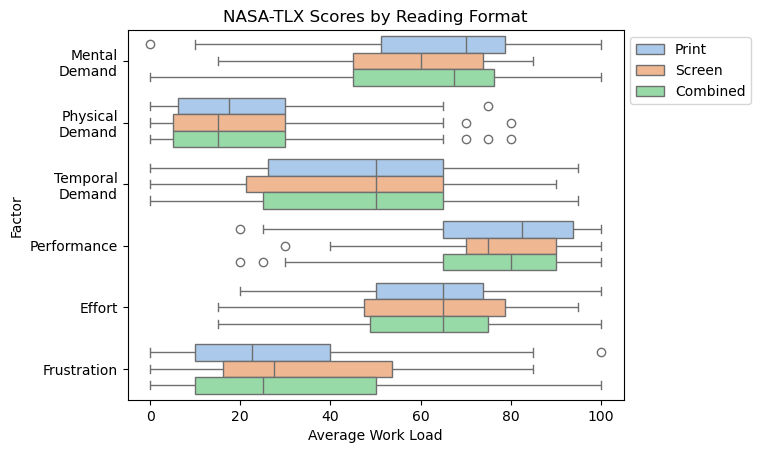

In [181]:
# plt.figure(figsize=(5,10))
sns.boxplot(
    y='factor',        # Horizontal → factor on y-axis
    x='load',          # load on x-axis
    hue='format',
    data=nasa_tlx_long_combined,
    orient='h',        # important for horizontal bars
    palette='pastel'
)

plt.title('NASA-TLX Scores by Reading Format')
plt.xlabel('Average Work Load')
plt.ylabel('Factor')

plt.yticks(
    ticks=range(6),
    labels=[
        'Mental\nDemand', 'Physical\nDemand', 'Temporal\nDemand',
        'Performance', 'Effort', 'Frustration'
    ]
)

plt.legend(bbox_to_anchor=(1.00, 1), loc='upper left')

plt.savefig(
    'Horizontal NASA-TLX Scores by Reading Format.png',
    dpi=300,
    bbox_inches='tight',
    pad_inches=0.3
)
plt.show()

## ARQ Median

In [97]:
learn_engage_cols = [1,7,9,12,13]
format_behave_cols = [2,3,4,5,6,8,10,11,14]

for i, each in enumerate(learn_engage_cols):
    learn_engage_cols[i] = f"arq{learn_engage_cols[i]}a"
for i, each in enumerate(format_behave_cols):
    format_behave_cols[i] = f"arq{format_behave_cols[i]}a"

In [98]:
arq_median_qs = df[arq_quanti_labels].median().reset_index()
arq_median_qs.columns = ['q', 'median']
arq_median_qs

,q,median
0,arq1a,1.0
1,arq2a,-1.0
2,arq3a,-1.0
3,arq4a,0.0
4,arq5a,-1.0
5,arq6a,0.0
6,arq7a,1.0
7,arq8a,-1.0
8,arq9a,0.0
9,arq10a,-1.0


In [99]:
arq_median_samp = df[arq_quanti_labels].mean(axis=1).reset_index()
arq_median_samp['index'] += 1
arq_median_samp.columns = ['no.', 'arq_overall']
arq_median_samp['learn_engage'] = df[learn_engage_cols].mean(axis=1)
arq_median_samp['format_behave'] = df[format_behave_cols].mean(axis=1)
arq_median_samp['format'] = df['format']
arq_median_samp = arq_median_samp[['no.', 'format', 'learn_engage', 'format_behave', 'arq_overall']]
arq_median_samp

,no.,format,learn_engage,format_behave,arq_overall
0,1,Print,-1.4,-1.777778,-1.642857
1,2,Screen,1.4,-0.333333,0.285714
2,3,Print,0.2,-0.777778,-0.428571
3,4,Print,-0.2,-0.555556,-0.428571
4,5,Print,0.8,0.444444,0.571429
5,6,Screen,-1.4,-1.666667,-1.571429
6,7,Screen,0.6,-0.444444,-0.071429
7,8,Screen,1.4,0.666667,0.928571
8,9,Print,0.2,-1.777778,-1.071429
9,10,Print,0.2,-0.222222,-0.071429


ARQ No group

In [100]:
arq_median_samp.iloc[:,2:].describe()

,learn_engage,format_behave,arq_overall
count,60.000000,60.000000,60.000000
mean,0.276667,-0.444444,-0.186905
std,0.876891,0.813930,0.782360
min,-1.600000,-1.777778,-1.642857
25%,-0.200000,-1.111111,-0.785714
50%,0.200000,-0.555556,-0.142857
75%,1.000000,0.027778,0.303571
max,1.800000,1.555556,1.428571


In [101]:
arq_median_samp.iloc[:,2:].median()

learn_engage     0.200000
format_behave   -0.555556
arq_overall     -0.142857
dtype: float64

ARQ grouped according to Format

In [102]:
arq_median_samp.iloc[:,1:].groupby('format').describe().T

format                   Print     Screen
learn_engage  count  30.000000  30.000000
              mean    0.326667   0.226667
              std     0.863806   0.901697
              min    -1.400000  -1.600000
              25%    -0.150000  -0.350000
              50%     0.200000   0.400000
              75%     1.000000   0.950000
              max     1.800000   1.600000
format_behave count  30.000000  30.000000
              mean   -0.444444  -0.444444
              std     0.876348   0.761460
              min    -1.777778  -1.666667
              25%    -1.083333  -1.083333
              50%    -0.555556  -0.500000
              75%     0.194444   0.000000
              max     1.333333   1.555556
arq_overall   count  30.000000  30.000000
              mean   -0.169048  -0.204762
              std     0.817319   0.759350
              min    -1.642857  -1.571429
              25%    -0.714286  -0.785714
              50%    -0.142857  -0.142857
              75%     0.482143   0.285714
              max     1.285714   1.428571

In [103]:
arq_median_samp.iloc[:,1:].groupby('format').median()

,learn_engage,format_behave,arq_overall
format,,,
Print,0.2,-0.555556,-0.142857
Screen,0.4,-0.500000,-0.142857


ARQ Visualization

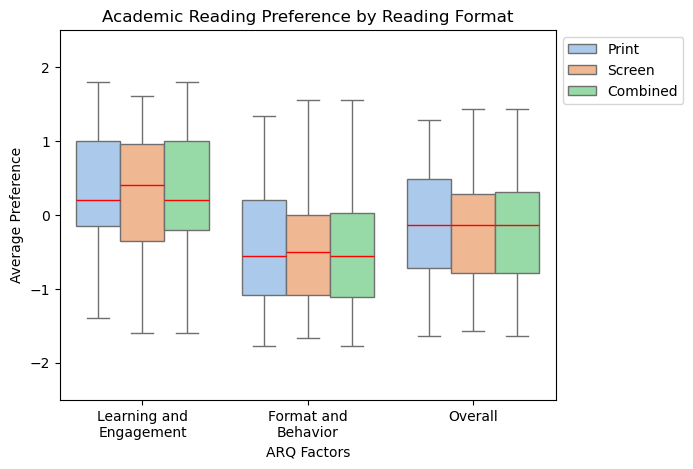

In [162]:
arq_median_samp_long = arq_median_samp.melt(id_vars=['format'], value_vars=['learn_engage', 'format_behave', 'arq_overall'], var_name='arq', value_name='average')
arq_median_samp_long_2 = arq_median_samp_long.copy()
arq_median_samp_long_2['format'] = 'Combined'
arq_median_long_combined = pd.concat([arq_median_samp_long, arq_median_samp_long_2])
sns.boxplot(x='arq', y='average', hue='format', data=arq_median_long_combined, palette='pastel', medianprops={'color': 'red'})

plt.legend(bbox_to_anchor=(1.00, 1), loc='upper left')

plt.title('Academic Reading Preference by Reading Format')
plt.ylabel('Average Preference')
plt.xlabel('ARQ Factors')
plt.xticks(
    ticks=range(3),          # positions of the ticks
    labels=['Learning and\nEngagement', 'Format and\nBehavior', 'Overall']
)
plt.ylim(-2.5,2.5)
plt.savefig(
    'Academic Reading Preference by Reading Format.png',
    dpi=300,
    bbox_inches='tight',
    pad_inches=0.3
)
plt.show()

## Comprehension

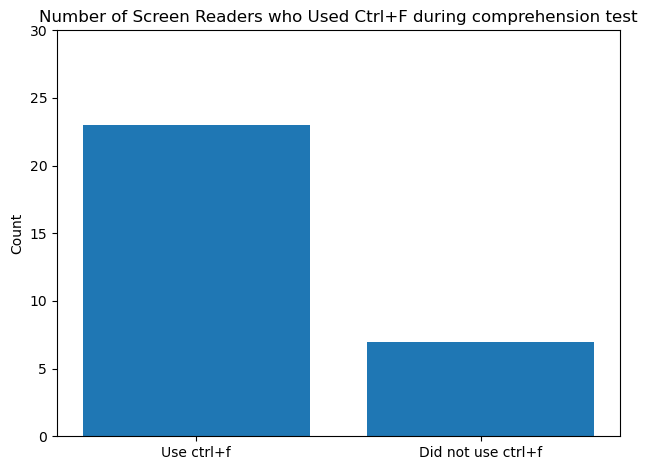

In [50]:
ctrlf_count = df[df['format'] == 'Screen']['ctrlf'].value_counts().reset_index()
plt.bar(ctrlf_count['ctrlf'], ctrlf_count['count'])
plt.xticks(
    ticks=range(2),
    labels=['Use ctrl+f', 'Did not use ctrl+f']
)
plt.ylabel("Count")
plt.title("Number of Screen Readers who Used Ctrl+F during comprehension test")
plt.tight_layout()
plt.ylim(0,30)
plt.show()

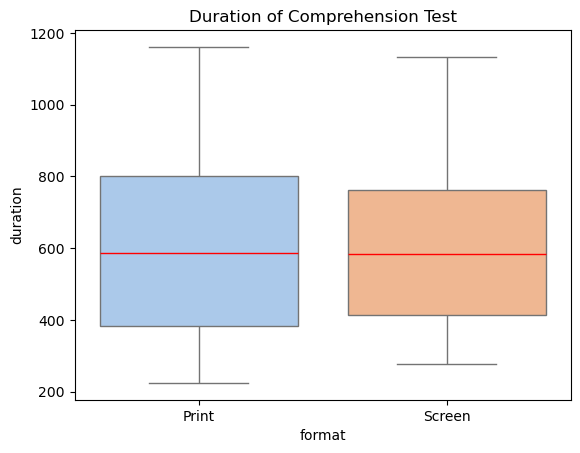

In [51]:
sns.boxplot(x='format', y='duration', hue='format', data=df[['format', 'duration']], palette='pastel', medianprops={'color': 'red'})
plt.title("Duration of Comprehension Test")
plt.show()

Recall and Intepret Scores grouped according to format

In [52]:
compre_scores = df[['format', 'recall', 'interpret']]
compre_scores.groupby('format').describe().T

format               Print     Screen
recall    count  30.000000  30.000000
          mean    3.966667   4.233333
          std     0.808717   0.817200
          min     2.000000   2.000000
          25%     4.000000   4.000000
          50%     4.000000   4.000000
          75%     4.000000   5.000000
          max     5.000000   5.000000
interpret count  30.000000  30.000000
          mean    3.200000   3.100000
          std     1.186127   1.241523
          min     0.000000   0.000000
          25%     2.250000   2.000000
          50%     3.000000   3.000000
          75%     4.000000   4.000000
          max     5.000000   5.000000

In [53]:
compre_scores.groupby('format').median()

,recall,interpret
format,,
Print,4.0,3.0
Screen,4.0,3.0


Recall and Intepret Scores no group

In [54]:
compre_scores.describe()

,recall,interpret
count,60.000000,60.000000
mean,4.100000,3.150000
std,0.817188,1.204863
min,2.000000,0.000000
25%,4.000000,2.000000
50%,4.000000,3.000000
75%,5.000000,4.000000
max,5.000000,5.000000


In [55]:
compre_scores.iloc[:,1:].median()

recall       4.0
interpret    3.0
dtype: float64

Recall and Interpret Sccores Visualization

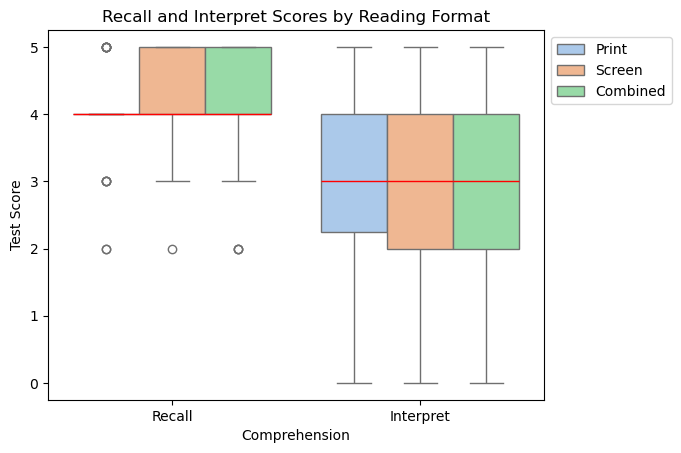

In [56]:
compre_scores_long = df[['format', 'recall', 'interpret']].melt(id_vars=['format'], value_vars=['recall', 'interpret'], var_name='comprehension', value_name='score')
compre_scores_long_2 = compre_scores_long.copy()
compre_scores_long_2['format'] = 'Combined'
compre_scores_long_combined = pd.concat([compre_scores_long, compre_scores_long_2])

sns.boxplot(x='comprehension', y='score', hue='format', data=compre_scores_long_combined, palette='pastel', medianprops={'color': 'red'})
plt.title('Recall and Interpret Scores by Reading Format')
plt.legend(bbox_to_anchor=(1.00, 1), loc='upper left')
plt.ylabel('Test Score')
plt.xticks(
    ticks=range(2),          # positions of the ticks
    labels=['Recall', 'Interpret']
)
plt.xlabel('Comprehension')
plt.savefig(
    'Recall and Interpret Scores by Reading Format.png',
    dpi=300,
    bbox_inches='tight',
    pad_inches=0.3
)
plt.show()

Overall Compre grouped according to format

In [57]:
overall_compre = data=df[['format', 'compre']]
overall_compre.groupby('format').describe().T

format            Print     Screen
compre count  30.000000  30.000000
       mean    7.166667   7.333333
       std     1.723736   1.688365
       min     3.000000   3.000000
       25%     6.250000   6.000000
       50%     7.000000   8.000000
       75%     8.000000   9.000000
       max    10.000000  10.000000

In [58]:
overall_compre.groupby('format').median()

,compre
format,
Print,7.0
Screen,8.0


Overall Compre no group

In [59]:
overall_compre.describe()

,compre
count,60.000000
mean,7.250000
std,1.693707
min,3.000000
25%,6.000000
50%,7.500000
75%,8.250000
max,10.000000


In [60]:
overall_compre['compre'].median()

np.float64(7.5)

Overall Comprehension Visualization

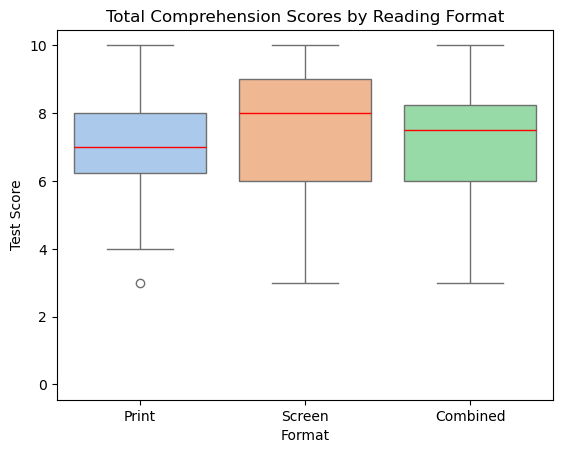

In [61]:
overall_compre_2 = overall_compre.copy()
overall_compre_2['format'] = 'Combined'
overall_compre_combined = pd.concat([overall_compre, overall_compre_2])
sns.boxplot(x='format', y='compre', hue='format', data=overall_compre_combined, palette='pastel', medianprops={'color': 'red'})
plt.title('Total Comprehension Scores by Reading Format')
plt.ylabel('Test Score')
plt.ylim((-0.45,10.45))
plt.xlabel('Format')
plt.savefig(
    'Total Comprehension Scores by Reading Format.png',
    dpi=300,
    bbox_inches='tight',
    pad_inches=0.3
)
plt.show()

Lookback grouped according to format

In [66]:
df['lb'].describe()

count    60.000000
mean     10.283333
std      10.473682
min       0.000000
25%       2.000000
50%       7.000000
75%      14.250000
max      41.000000
Name: lb, dtype: float64

In [67]:
df['lb'].median()

np.float64(7.0)

Lookback no grouping

In [68]:
df[['format', 'lb']].groupby('format').describe().T

format        Print     Screen
lb count  30.000000  30.000000
   mean   10.966667   9.600000
   std    12.471992   8.164684
   min     0.000000   1.000000
   25%     2.000000   4.000000
   50%     3.500000   8.500000
   75%    17.500000  12.000000
   max    41.000000  40.000000

In [69]:
df[['format', 'lb']].groupby('format').median()

,lb
format,
Print,3.5
Screen,8.5


In [74]:
compre_scores_long_combined

,format,comprehension,score
0,Print,recall,4
1,Screen,recall,5
2,Print,recall,4
3,Print,recall,4
4,Print,recall,4
...,...,...,...
115,Combined,interpret,2
116,Combined,interpret,5
117,Combined,interpret,3
118,Combined,interpret,2


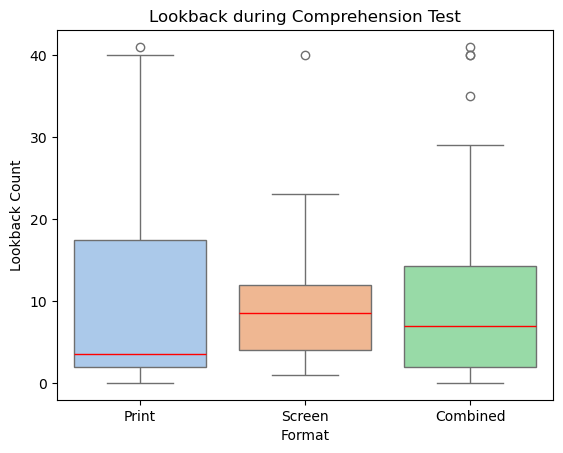

In [83]:
lb = df[['format', 'lb']]
lb_2 = lb.copy()
lb_2['format'] = 'Combined'
lb_combined = pd.concat([lb,lb_2])

sns.boxplot(x='format', y='lb', hue='format', data=lb_combined, palette='pastel', medianprops={'color': 'red'})
plt.title('Lookback during Comprehension Test')
plt.ylabel('Lookback Count')
plt.xlabel('Format')
plt.savefig(
    'Lookback during Comprehension Test.png',
    dpi=300,
    bbox_inches='tight',
    pad_inches=0.3
)
plt.show()

# Statistical Tests

In [256]:
def cohend(d1, d2):
	# calculate the size of samples
	n1, n2 = len(d1), len(d2)
	# calculate the variance of the samples
	s1, s2 = np.var(d1, ddof=1), np.var(d2, ddof=1)
	# calculate the pooled standard deviation
	s = np.sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))
	# calculate the means of the samples
	u1, u2 = np.mean(d1), np.mean(d2)
	# calculate the effect size
	return (u1 - u2) / s

def rankbiserial(d1, d2, U):
    # calculate the size of samples
    n1, n2 = len(d1), len(d2)
    # calculate the means of the samples
    u1, u2 = np.mean(d1), np.mean(d2)
    
    return 1-((2*U)/(n1*n2))

## Normality Test

In [257]:
df_inf = df[[col for col in df.columns if ('arq' not in col) and ('qual' not in col)]]
df_inf = pd.concat([df[['format']], arq_median_samp[['learn_engage', 'format_behave', 'arq_overall']], df_inf.iloc[:,2:-6], df_inf.iloc[:,-6:-2]], axis=1)
df_inf.to_excel('quanti_vals.xlsx')

No Group Normality

In [310]:
stats, pvals = shapiro(df_inf.iloc[:,1:], axis=0)
normality_no_gr = pd.DataFrame({'variable': list(df_inf.columns)[1:], 'p-value': pvals})

normality_no_gr['test'] = normality_no_gr['p-value'].apply(lambda x: 'Parametric' if x > 0.05 else 'Non-Parametric')

normality_no_gr

,variable,p-value,test
0,learn_engage,7.368178e-02,Parametric
1,format_behave,2.566860e-01,Parametric
2,arq_overall,3.129714e-01,Parametric
3,md,4.091460e-02,Non-Parametric
4,pd,4.777416e-06,Non-Parametric
5,td,7.184324e-02,Parametric
6,pf,4.092961e-04,Non-Parametric
7,ef,2.297856e-02,Non-Parametric
8,fr,5.447380e-04,Non-Parametric
9,recall,3.896624e-07,Non-Parametric


Grouped Normality

In [285]:
stats, pvals = shapiro(df_inf[df_inf['format'] == 'Print'].iloc[:, 1:], axis=0)
print_normality = pd.DataFrame({"variable":list(df_inf.columns)[1:], "shapiro": pvals})

stats, pvals = shapiro(df_inf[df_inf['format'] == 'Screen'].iloc[:, 1:], axis=0)
screen_normality = pd.DataFrame({"variable":list(df_inf.columns)[1:], "shapiro": pvals})

normality = pd.merge(print_normality, screen_normality, on='variable')
normality.columns = ['variable', 'print_shapiro', 'screen_shapiro']

normality['test stat'] = normality[['print_shapiro', 'screen_shapiro']].apply(
    lambda x: 'Parametric' 
    if (x['print_shapiro'] >= 0.05) & (x['screen_shapiro'] >= 0.05)
    else 'Non-Parametric', 
    axis=1
)

normality

,variable,print_shapiro,screen_shapiro,test stat
0,learn_engage,0.253215,0.186460,Parametric
1,format_behave,0.408735,0.466288,Parametric
2,arq_overall,0.375580,0.609876,Parametric
3,md,0.057488,0.092494,Parametric
4,pd,0.001376,0.000502,Non-Parametric
5,td,0.717629,0.165485,Parametric
6,pf,0.003058,0.042071,Non-Parametric
7,ef,0.468324,0.026312,Non-Parametric
8,fr,0.001996,0.054298,Non-Parametric
9,recall,0.000129,0.000078,Non-Parametric


## Difference on ARQ between groups

Equality of Variance Test (Levene's Test)

In [259]:
ps = []
cols = list(df_inf.columns)[1:4]
for each in cols:
    stat, p = levene(df_inf[df_inf['format'] == 'Print'][each], df_inf[df_inf['format'] == 'Screen'][each], center='mean')
    ps.append(p)
levene_arq_df = pd.DataFrame({'variable': cols, 'p-value':ps})
levene_arq_df['interpretation'] = levene_arq_df['p-value'].apply(lambda x: 'equal variance' if x > 0.05 else 'not equal variance')
levene_arq_df

,variable,p-value,interpretation
0,learn_engage,0.632183,equal variance
1,format_behave,0.369246,equal variance
2,arq_overall,0.801218,equal variance


Actual Test

In [235]:
ts = []
ps = []
ds = []
cols = list(df_inf.columns)[1:4]
for each in cols:
    stat, p = ttest_ind(df_inf[df_inf['format'] == 'Print'][each], df_inf[df_inf['format'] == 'Screen'][each], equal_var=True)
    d = cohend(df_inf[df_inf['format'] == 'Print'][each], df_inf[df_inf['format'] == 'Screen'][each])
    ts.append(stat)
    ps.append(p)
    ds.append(d)

results = pd.DataFrame({'variable': cols, 't': ts, 'p-value': ps, 'd': ds})
results

,variable,t,p-value,d
0,learn_engage,4.386389e-01,0.662553,1.132561e-01
1,format_behave,-2.618948e-16,1.000000,-6.762095e-17
2,arq_overall,1.753411e-01,0.861422,4.527289e-02


## Difference on NASA-TLX between groups

Equality of Variance Test (Levene's Test) on MD, TD

In [237]:
ps = []
cols = ['md', 'td']
for each in cols:
    stat, p = levene(df_inf[df_inf['format'] == 'Print'][each], df_inf[df_inf['format'] == 'Screen'][each], center='mean')
    ps.append(p)
levene_arq_df = pd.DataFrame({'variable': cols, 'p-value':ps})
levene_arq_df['interpretation'] = levene_arq_df['p-value'].apply(lambda x: 'equal variance' if x > 0.05 else 'not equal variance')
levene_arq_df

,variable,p-value,interpretation
0,md,0.232588,equal variance
1,td,0.515237,equal variance


Actual Test

In [275]:
stats = []
ps = []
effects = []
cols = list(df_inf.columns)[4:10]
for each in cols:
    if each in ['md', 'td']:
        stat, p = ttest_ind(df_inf[df_inf['format'] == 'Print'][each], df_inf[df_inf['format'] == 'Screen'][each], equal_var=True)
        d = cohend(df_inf[df_inf['format'] == 'Print'][each], df_inf[df_inf['format'] == 'Screen'][each])
        effects.append('d='+str(d))
        stats.append('t='+str(stat))
    else: 
        stat, p = mannwhitneyu(df_inf[df_inf['format'] == 'Print'][each], df_inf[df_inf['format'] == 'Screen'][each], method='exact')
        r = rankbiserial(df_inf[df_inf['format'] == 'Print'][each], df_inf[df_inf['format'] == 'Screen'][each], stat)
        effects.append('r='+str(r))
        stats.append('U='+str(stat))
    ps.append(p)

results = pd.DataFrame({'variable':cols, 'stat': stats, 'p-value': ps, 'effect': effects})
results

,variable,stat,p-value,effect
0,md,t=0.9729564662631356,0.334615,d=0.25121627936146285
1,pd,U=465.0,0.831500,r=-0.03333333333333344
2,td,t=0.0,1.000000,d=0.0
3,pf,U=498.5,0.485300,r=-0.10777777777777775
4,ef,U=448.0,0.982441,r=0.004444444444444473
5,fr,U=393.0,0.406289,r=0.1266666666666667


## Difference on Comprehension between groups

In [281]:
stats = []
ps = []
effects = []
cols = list(df_inf.columns)[-4:]
for each in cols:
    stat, p = mannwhitneyu(df_inf[df_inf['format'] == 'Print'][each], df_inf[df_inf['format'] == 'Screen'][each], method='exact')
    r = rankbiserial(df_inf[df_inf['format'] == 'Print'][each], df_inf[df_inf['format'] == 'Screen'][each], stat)
    effects.append(r)
    stats.append(stat)
    ps.append(p)

results = pd.DataFrame({'variable':cols, 'stat': stats, 'p-value': ps, 'effect': effects})
results

,variable,stat,p-value,effect
0,recall,364.5,0.213247,0.190000
1,interpret,460.0,0.889136,-0.022222
2,compre,420.0,0.664981,0.066667
3,lb,407.0,0.532498,0.095556


## Correlation

No Grouping

In [350]:
stats, p = spearmanr(df_inf.iloc[:,1:])
cols = list(df_inf.iloc[:,1:].columns)
stats = np.round(stats, 5).astype(str)
for i in range(len(cols)):
    for j in range(len(cols)):
        if stats[i][j] == '1.0':
            continue
        if p[i][j] < 0.001: 
            stats[i][j] += '**'
        elif p[i][j] < 0.05:
            stats[i][j] += '*'
mask = np.tril(np.ones(stats.shape), k=0).astype(bool)  # k=0 includes diagonal
stats_masked = np.where(mask, '', stats)  # lower triangle becomes empty string
corr_no_group = pd.DataFrame(stats_masked, index=cols, columns=cols)
corr_no_group.iloc[:-1,1:]

,format_behave,arq_overall,md,pd,td,pf,ef,fr,recall,interpret,compre,lb
learn_engage,0.75359**,0.89652**,-0.12127,0.13463,0.02113,0.03378,-0.19486,-0.05396,-0.10676,-0.1084,-0.14253,-0.07968
format_behave,,0.95878**,0.02994,0.16975,-0.02686,-0.03764,-0.0393,0.01404,-0.11553,-0.06928,-0.11822,0.03402
arq_overall,,,-0.02973,0.14031,0.00506,-0.01308,-0.08557,-0.01321,-0.09842,-0.05287,-0.10022,0.00151
md,,,,0.28783*,0.36282*,-0.1373,0.49507**,0.44311**,0.19796,0.03823,0.12153,0.23254
pd,,,,,0.20286,-0.18502,0.26095*,0.37821*,-0.02936,-0.23956,-0.19865,0.06789
td,,,,,,-0.12763,0.36359*,0.42261**,0.41835**,0.23977,0.39134*,0.17588
pf,,,,,,,-0.07007,-0.22451,-0.0856,0.07682,0.06051,-0.3257*
ef,,,,,,,,0.31505*,-0.01205,-0.10623,-0.08378,0.33007*
fr,,,,,,,,,0.25122,0.09161,0.19819,0.25675*
recall,,,,,,,,,,0.34172*,0.71011**,0.21803


For Print Group

In [357]:
stats, p = spearmanr(df_inf[df_inf['format']=='Print'].iloc[:,1:])
cols = list(df_inf.iloc[:,1:].columns)
stats = np.round(stats, 5).astype(str)
for i in range(len(cols)):
    for j in range(len(cols)):
        if stats[i][j] == '1.0':
            continue
        if p[i][j] < 0.001: 
            stats[i][j] += '**'
        elif p[i][j] < 0.05:
            stats[i][j] += '*'
mask = np.tril(np.ones(stats.shape), k=0).astype(bool)  # k=0 includes diagonal
stats_masked = np.where(mask, '', stats)  # lower triangle becomes empty string
corr_no_group = pd.DataFrame(stats_masked, index=cols, columns=cols)
corr_no_group.iloc[:-1,1:]

,format_behave,arq_overall,md,pd,td,pf,ef,fr,recall,interpret,compre,lb
learn_engage,0.71224**,0.86637**,-0.32381,0.15359,-0.28863,0.18575,-0.42964*,-0.20703,-0.34253,-0.19176,-0.26057,-0.31581
format_behave,,0.95485**,-0.05124,-0.02088,-0.38748*,0.05584,-0.27949,-0.03315,-0.28066,-0.03546,-0.14498,-0.05994
arq_overall,,,-0.15032,0.00628,-0.32521,0.08384,-0.33188,-0.08565,-0.30146,-0.07181,-0.17226,-0.12231
md,,,,0.14558,0.31091,-0.10376,0.56331*,0.36381*,0.41998*,0.13852,0.26648,0.25104
pd,,,,,-0.03457,-0.16763,0.14911,0.28449,-0.15476,-0.28386,-0.32201,-0.07292
td,,,,,,-0.07249,0.45482*,0.32318,0.4508*,0.45462*,0.56642*,0.11369
pf,,,,,,,-0.05671,-0.14851,-0.01541,0.21082,0.21249,-0.35443
ef,,,,,,,,0.58199**,0.17638,0.17162,0.20613,0.26467
fr,,,,,,,,,-0.00598,0.17467,0.12115,0.28143
recall,,,,,,,,,,0.46143*,0.74704**,0.17573


For Screen Group

In [358]:
stats, p = spearmanr(df_inf[df_inf['format']=='Screen'].iloc[:,1:])
cols = list(df_inf.iloc[:,1:].columns)
stats = np.round(stats, 5).astype(str)
for i in range(len(cols)):
    for j in range(len(cols)):
        if stats[i][j] == '1.0':
            continue
        if p[i][j] < 0.001: 
            stats[i][j] += '**'
        elif p[i][j] < 0.05:
            stats[i][j] += '*'
mask = np.tril(np.ones(stats.shape), k=0).astype(bool)  # k=0 includes diagonal
stats_masked = np.where(mask, '', stats)  # lower triangle becomes empty string
corr_no_group = pd.DataFrame(stats_masked, index=cols, columns=cols)
corr_no_group.iloc[:-1,1:]

,format_behave,arq_overall,md,pd,td,pf,ef,fr,recall,interpret,compre,lb
learn_engage,0.76259**,0.91292**,0.10143,0.12575,0.28522,-0.1836,0.0037,0.09753,0.10071,-0.06857,-0.04138,0.27359
format_behave,,0.94725**,0.14068,0.36553*,0.34555,-0.20465,0.20562,0.03302,0.06675,-0.09809,-0.05713,0.22202
arq_overall,,,0.13686,0.28232,0.31818,-0.23902,0.14817,0.06503,0.10176,-0.06581,-0.02936,0.25134
md,,,,0.51692*,0.4541*,-0.26518,0.49111*,0.57315**,-0.01431,-0.1459,-0.09981,0.11164
pd,,,,,0.42591*,-0.23702,0.38341*,0.48218*,0.09327,-0.17894,-0.06278,0.14495
td,,,,,,-0.20211,0.29299,0.57525**,0.39121*,0.06775,0.24632,0.22788
pf,,,,,,,-0.09061,-0.30161,-0.13879,-0.0892,-0.09242,-0.25633
ef,,,,,,,,0.1005,-0.19584,-0.32261,-0.31707,0.2373
fr,,,,,,,,,0.47211*,0.0568,0.29124,0.15221
recall,,,,,,,,,,0.2765,0.68372**,0.26157
